In [1]:
import requests
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython.display import HTML
from time import sleep
%matplotlib inline

In [2]:
headers = {"Authentication":"SkncRK5EwmLg8NSQwi0vAVhkc"}
args = {"$limit": 13000, "$offset": 0}

response = requests.get("https://data.providenceri.gov/resource/gfyp-tfg9.json",headers=headers, params=args)

response_json = response.json()

In [3]:
pvd_crimes = pd.DataFrame(response_json)

In [4]:
pvd_crimes.head()

,casenumber,counts,location,month,offense_desc,reported_date,reporting_officer,statute_code,statute_desc,year
0,2017-00111938,1,88 ELLERY ST,10,Traffic Violation,2017-10-25T12:50:00.000,MMena-Torres,31-3-1,Parking or MV Violation,2017
1,2018-00014529,1,188 DOUGLAS AVE,2,Larceny from Motor Vehicle,2018-02-10T10:35:00.000,Central Station,11-41-1,LARCENY/U $1500 - FROM MV,2018
2,2018-00020241,1,21 MIDDLETON ST,2,"Assault, Simple",2018-02-26T00:25:00.000,PCaminero,11-5-3,SIMPLE ASSAULT/BATTERY,2018
3,2017-00112135,1,539 SMITH ST,10,Weapons,2017-10-25T20:30:29.000,VPazzetta,11-47-42,WEAPONS OTHER THAN FIREARMS PROHIBITED,2017
4,2017-00119459,1,960 BROAD ST,11,Vandalism,2017-11-13T09:06:59.000,RChin,11-44-1,VANDALISM/MALICIOUS INJURY TO PROPERTY,2017


In [5]:
pvd_crimes.shape

(12619, 10)

In [6]:
pvd_crimes["reported_date"] = pvd_crimes["reported_date"].apply(dt.datetime.strptime, args=("%Y-%m-%dT%H:%M:%S.%f",))

In [7]:
pvd_crimes["hour"] = [i.hour for i in pvd_crimes['reported_date']]
pvd_crimes["minute"] = [i.minute for i in pvd_crimes['reported_date']]
pvd_crimes["day"] = [i.day for i in pvd_crimes['reported_date']]

In [8]:
pvd_crimes['location'] = pvd_crimes["location"].astype(str)

In [9]:
pvd_crimes["hour"] = pd.to_numeric(pvd_crimes["hour"])

In [10]:
pvd_crimes['location'] = pvd_crimes['location'].str.replace("&", "at")
pvd_crimes['location'] = pvd_crimes['location'].str.replace("/", "at")
pvd_crimes['location'] = pvd_crimes['location'] + ', PROVIDENCE, RI'

In [11]:
pvd_crimes["hour"].mode()

0    16
dtype: int64

In [12]:
pvd_crimes.groupby("offense_desc").count().sort_values('counts', ascending = False).head(10)

,casenumber,counts,location,month,reported_date,reporting_officer,statute_code,statute_desc,year,hour,minute,day
offense_desc,,,,,,,,,,,,
Traffic Violation,1304,1304,1304,1304,1304,1299,1304,1304,1304,1304,1304,1304
Vandalism,1089,1089,1089,1089,1089,1087,1089,1089,1089,1089,1089,1089
Larceny from Motor Vehicle,1080,1080,1080,1080,1080,1079,1080,1080,1080,1080,1080,1080
"Assault, Simple",995,995,995,995,995,991,995,995,995,995,995,995
"Larceny, Other",813,813,813,813,813,808,813,813,813,813,813,813
RI Statute Violation,649,649,649,649,649,647,649,649,649,649,649,649
Missing Persons,607,607,607,607,607,603,607,607,607,607,607,607
Burglary,495,495,495,495,495,494,495,495,495,495,495,495
Drug Offenses,491,491,491,491,491,489,491,491,491,491,491,491


In [13]:
top_crimes = ["Vandalism", "Assault, Simple", "Larceny from Motor Vehicle", "Traffic Violation", "Larceny, Other", 
             "RI Statute Violation", "Burglary", "Disorderly Conduct"]

Crimes Commited per Hour

In [14]:
crime_counts_by_hour = pvd_crimes.groupby(["offense_desc", "hour"]).count()

In [15]:
crime_counts_by_hour = crime_counts_by_hour["counts"]

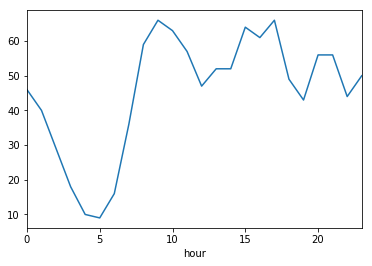

In [16]:
crime_counts_by_hour.loc["Vandalism"].plot();

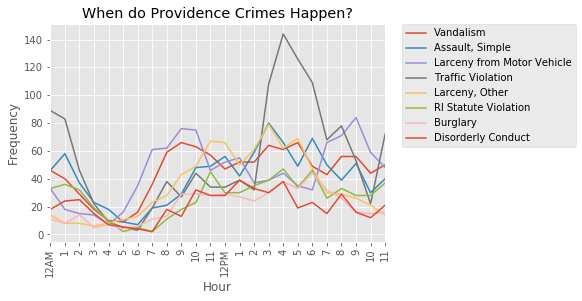

In [17]:
plt.style.use('ggplot')
for crime in top_crimes:
    crime_counts_by_hour.loc[crime].plot()
plt.legend(top_crimes, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(np.arange(24), ("12AM", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12PM", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"),  rotation='vertical')

plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('When do Providence Crimes Happen?');

In [18]:
crime_counts_by_month = pvd_crimes[pvd_crimes.month != "9"]
crime_counts_by_month = crime_counts_by_month.groupby(["offense_desc", "month"]).count()
crime_counts_by_month = crime_counts_by_month["counts"]
crime_counts_by_month.head()

offense_desc  month
Abduction     10       3
              11       2
Accident      11       1
              12       1
              3        1
Name: counts, dtype: int64

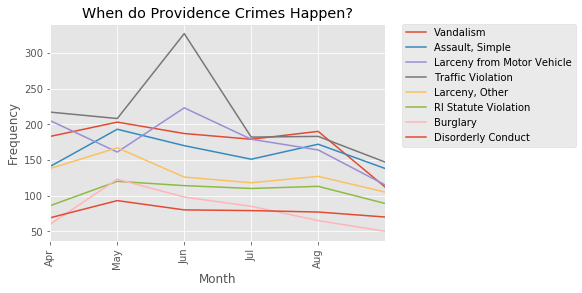

In [19]:
plt.style.use('ggplot')
for crime in top_crimes:
    crime_counts_by_month.loc[crime].plot()
    
plt.legend(top_crimes, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.xticks(np.arange(5), ("Apr", "May", "Jun", "Jul", "Aug"),  rotation='vertical')

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('When do Providence Crimes Happen?');

In [20]:
crime_counts = pvd_crimes.groupby("offense_desc", as_index=False).count()[["offense_desc","counts"]]
crime_counts_plot = crime_counts.sort_values('counts', ascending = False).head(10)
crime_counts_plot = crime_counts_plot.sort_values("counts", ascending = True)

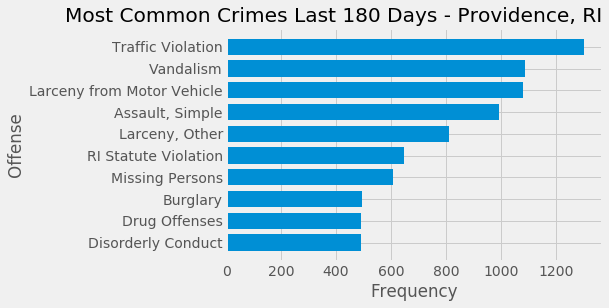

In [21]:
plt.style.use('fivethirtyeight')

offense = crime_counts_plot["offense_desc"]
frequencies = crime_counts_plot["counts"]

pos = np.arange(len(offense))
width = 0.75     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_yticks(pos)
ax.set_yticklabels(offense)

plt.barh(pos, frequencies, width)

plt.xlabel('Frequency')
plt.ylabel('Offense')
plt.title('Most Common Crimes Last 180 Days - Providence, RI', loc ="right");

In [22]:
pvd_crimes["lat"] = None
pvd_crimes["lon"] = None

In [45]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode(pvd_crimes['location'][0])
print((location.latitude, location.longitude))

(41.81067575, -71.4381505)


In [47]:
from geopy.exc import GeocoderTimedOut

def do_geocode(address):
    try:
        geolocator = Nominatim()
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [31]:
g = geocoder.google(pvd_crimes['location'][0])
print(g.ok)
#print(g.latlng[0])

False


In [48]:
for i, row in enumerate(pvd_crimes["location"]):
    location = do_geocode(row)
    if location != None:
        pvd_crimes.set_value(i, 'lat', location.latitude)
        pvd_crimes.set_value(i, 'lon', location.longitude)
    sleep(1)

GeocoderUnavailable: Service not available

In [49]:
pvd_crimes['lat']

0        41.8107
1        41.8348
2        41.8204
3        41.8362
4         41.791
5        41.8168
6        41.8346
7        41.8514
8           None
9        41.8076
10          None
11          None
12       41.8241
13       41.8734
14       41.8324
15       41.8031
16       41.8207
17       41.8801
18       41.8258
19          None
20       41.7991
21       41.8221
22       41.8348
23          None
24       41.8017
25       41.8308
26       41.8163
27        41.903
28       41.8068
29       41.8085
          ...   
12589       None
12590       None
12591       None
12592       None
12593       None
12594       None
12595       None
12596       None
12597       None
12598       None
12599       None
12600       None
12601       None
12602       None
12603       None
12604       None
12605       None
12606       None
12607       None
12608       None
12609       None
12610       None
12611       None
12612       None
12613       None
12614       None
12615       None
12616       No

In [122]:
filename = "PVD_Crimes_03-25-2018"
pvd_crimes.to_csv(filename)

In [123]:
null_lons = pvd_crimes[pvd_crimes["lon"].isnull()]

In [124]:
index_null_list = list(null_lons["location"].index)

In [130]:
null_lons.head()

221

### Repeat below until length of null_lons does not decrease any more, then we should have a few left to fix somehow.

In [131]:
for i in index_null_list:
    row = pvd_crimes["location"][i]
    row = (row + ", Providence, RI")
    g = geocoder.google(row)
    if g.ok:
        pvd_crimes["lat"][i] = g.latlng[0]
        pvd_crimes["lon"][i] = g.latlng[1]
    sleep(1)

/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
Status code 500 from https://maps.googleapis.com/maps/api/geocode/json: ERROR - 500 Server Error: Internal Server Error for url: https://maps.googleapis.com/maps/api/geocode/json?address=29+BAINBRIDGE+AVE%2C+Providence%2C+RI&bounds=&components=&region=&language=
Status code 500 from https://maps.googleapis.com/maps/api/geocode/json: ERROR - 500 Server Error: Internal Server Error for url: https://maps.g

In [133]:
pvd_crimes.to_csv(filename)

In [134]:
null_lons = pvd_crimes[pvd_crimes["lon"].isnull()]
index_null_list = list(null_lons["location"].index)
len(index_null_list)

36

In [136]:
null_lons
pvd_crimes["location"][11] = "COLFAX ST at PRAIRIE ST"
pvd_crimes["location"][116] = "COLFAX ST at PRAIRIE ST"

/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
for i in index_null_list:
    row = pvd_crimes["location"][i]
    if "&" in row:
        row = row.replace("&", "at")
    if "/" in row:
        row = row.replace("/", "at")
    row = (row + ", Providence, RI")
    g = geocoder.google(row)
    if g.ok:
        pvd_crimes["lat"][i] = g.latlng[0]
        pvd_crimes["lon"][i] = g.latlng[1]
    sleep(1)

/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [138]:
null_lons = pvd_crimes[pvd_crimes["lon"].isnull()]
index_null_list = list(null_lons["location"].index)
len(index_null_list)

11

In [139]:
pvd_crimes.to_csv(filename)

In [142]:
for i in index_null_list:
    row = pvd_crimes["location"][i]
    if "&" in row:
        row = row.replace("&", "at")
    if "/" in row:
        row = row.replace("/", "at")
    row = (row + ", Providence, RI")
    g = geocoder.google(row)
    if g.ok:
        pvd_crimes["lat"][i] = g.latlng[0]
        pvd_crimes["lon"][i] = g.latlng[1]
    sleep(1)

/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [143]:
null_lons = pvd_crimes[pvd_crimes["lon"].isnull()]
index_null_list = list(null_lons["location"].index)
len(index_null_list)

4

In [150]:
pvd_crimes["location"]

,casenumber,counts,location,month,offense_desc,reported_date,reporting_officer,statute_code,statute_desc,year,hour,minute,day,lat,lon
442,2017-00051126,1,11 WISDOM AVE,5,Vandalism,2017-05-30T21:59:00.000,JSherman,11-44-1,VANDALISM/MALICIOUS INJURY TO PROPERTY,2017,21,59,30,None,None
615,2017-00078181,0,1 UNION STA,8,Request for Assistance,2017-08-06T16:00:07.000,EChin,Not Used,No violations,2017,16,0,6,None,None
649,2017-00051244,1,MANTON AVE & WESTMINSTER ST,5,Warrant\Capias,2017-05-31T11:04:50.000,FLopez,BWARRANT-6D,BENCH WARRANT ISSUED FROM 6TH DISTRICT COURT,2017,11,4,31,None,None
699,2017-00051244,1,MANTON AVE & WESTMINSTER ST,5,Traffic Violation,2017-05-31T11:04:50.000,FLopez,31-11-18,"Driving after Denial, Suspension or Revocation...",2017,11,4,31,None,None


In [151]:
pvd_crimes["location"][649] = "49 Olneyville Square"
pvd_crimes["location"][699] = "49 Olneyville Square"
pvd_crimes["location"][615] = "1 Union Station"

/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports unti

In [152]:
for i in index_null_list:
    row = pvd_crimes["location"][i]
    if "&" in row:
        row = row.replace("&", "at")
    if "/" in row:
        row = row.replace("/", "at")
    row = (row + ", Providence, RI")
    g = geocoder.google(row)
    if g.ok:
        pvd_crimes["lat"][i] = g.latlng[0]
        pvd_crimes["lon"][i] = g.latlng[1]
    sleep(1)

/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [153]:
null_lons = pvd_crimes[pvd_crimes["lon"].isnull()]
index_null_list = list(null_lons["location"].index)
len(index_null_list)

0

In [194]:
#pvd_crimes.drop(71, inplace = True)
pvd_crimes.reset_index(drop=True, inplace = True)

In [195]:
pvd_crimes.to_csv(filename)

In [168]:
from folium.plugins import MarkerCluster

In [2]:
PVD_Coor = (41.824, -71.4128)

pvd_map = folium.Map(location=PVD_Coor, tiles='CartoDB positron', zoom_start=12)

#add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(pvd_map)


for i in range(0, len(pvd_crimes)):
    folium.Marker(location = [pvd_crimes["lat"][i], pvd_crimes["lon"][i]] , 
                  popup=str(pvd_crimes['offense_desc'][i])+' '+str(pvd_crimes['reporting_officer'][i]+" "+str(pvd_crimes["month"][i]+"-"+"2017")),
                  icon=folium.Icon(color='darkblue')).add_to(marker_cluster)

NameError: name 'folium' is not defined

In [200]:
pvd_map.save(outfile= "pvd_crime_map.html")